In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/진현킴/Downloads/501.csv")

In [3]:
data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [4]:
data.dropna()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [5]:
data.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data.columns :
    data[i] = le.fit_transform(data[i])

Text(0.5, 1.0, 'label')

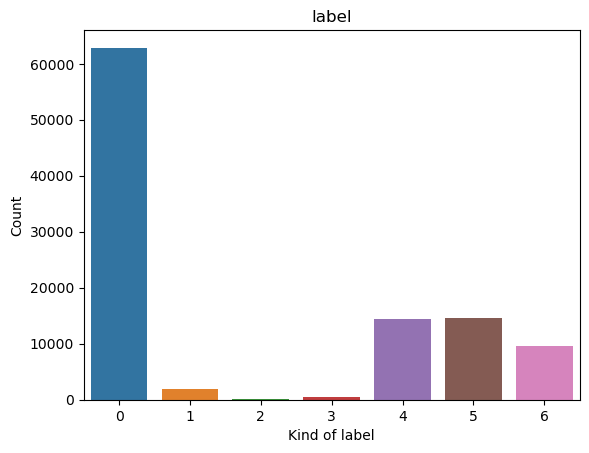

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = data, x="label")
plt.xlabel("Kind of label")
plt.ylabel("Count")
plt.title("label")

In [8]:
y = data['label']

y.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [9]:
X = data.iloc[:,0:7].values
X

array([[10235,  3358,  2077, ...,  5911,  3102,  5982],
       [10236,  3435,  2012, ...,  5990,  3063,  5967],
       [10236,  3558,  2024, ...,  6038,  3231,  5904],
       ...,
       [10233,  4434,  2010, ...,  6799,  3776,  6066],
       [10233,  4328,  2017, ...,  6800,  3734,  6272],
       [10234,  4174,  2017, ...,  6772,  3616,  6513]], dtype=int64)

In [10]:
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
print(y_train.shape)
print(y_test.shape)

(83088, 7)
(20772, 7)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(30,input_shape=(7,),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                240       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
Total params: 942
Trainable params: 942
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_history=model.fit(x = X_train, y = y_train, epochs=10, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/10
2597/2597 [==============================] - 13s 4ms/step - loss: 31.9627 - accuracy: 0.8543 - val_loss: 2.0362 - val_accuracy: 0.8965
Epoch 2/10
2597/2597 [==============================] - 11s 4ms/step - loss: 2.0500 - accuracy: 0.8920 - val_loss: 1.3933 - val_accuracy: 0.9249
Epoch 3/10
2597/2597 [==============================] - 11s 4ms/step - loss: 0.8818 - accuracy: 0.8976 - val_loss: 0.8919 - val_accuracy: 0.8192
Epoch 4/10
2597/2597 [==============================] - 11s 4ms/step - loss: 0.4092 - accuracy: 0.9074 - val_loss: 0.5033 - val_accuracy: 0.9098
Epoch 5/10
2597/2597 [==============================] - 11s 4ms/step - loss: 0.3184 - accuracy: 0.9169 - val_loss: 0.2393 - val_accuracy: 0.9420
Epoch 6/10
2597/2597 [==============================] - 11s 4ms/step - loss: 0.2792 - accuracy: 0.9210 - val_loss: 0.2525 - val_accuracy: 0.9311
Epoch 7/10
2597/2597 [==============================] - 11s 4ms/step - loss: 0.2789 - accuracy: 0.9245 - val_loss: 0.2987 - val_a

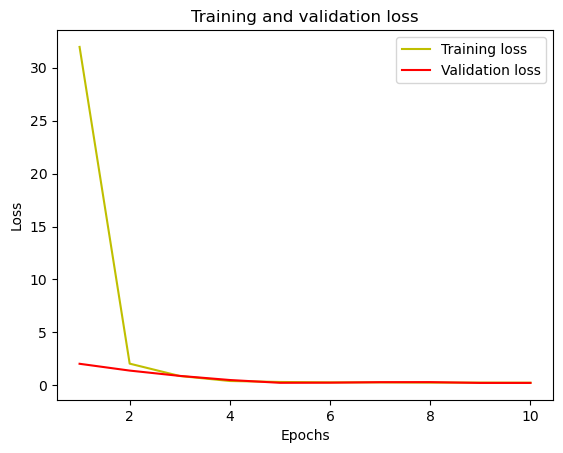

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

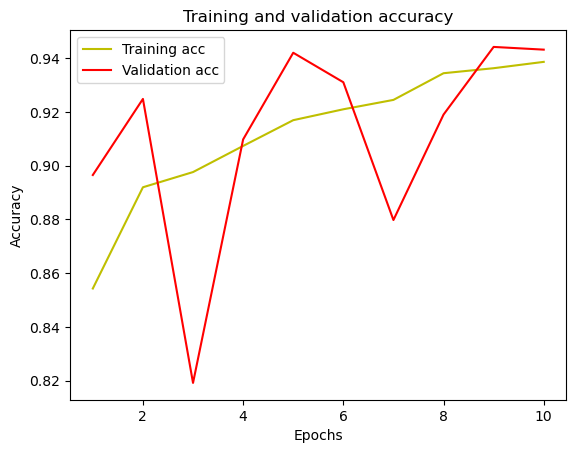

In [15]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12513
           1       0.00      0.00      0.00       410
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        95
           4       0.93      0.84      0.88      2920
           5       1.00      1.00      1.00      2930
           6       1.00      1.00      1.00      1884

    accuracy                           0.94     20772
   macro avg       0.55      0.55      0.55     20772
weighted avg       0.92      0.94      0.93     20772

[[12345     0     0     0   154     7     7]
 [  388     0     0     0    22     0     0]
 [   20     0     0     0     0     0     0]
 [   94     0     0     0     1     0     0]
 [  479     0     0     0  2441     0     0]
 [    8     0     0     0     0  2922     0]
 [    0     0     0     0     0     0  1884]]
